In [1]:
%pip install tweepy
%pip install textblob
%pip install nltk
%pip install matplotlib
%pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 29.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To

In [2]:
import tweepy
import re
import textblob

Api_key = 'bPLWMtnUuH6xkh9nlfniMiNZZ'
API_secret_key = 'ARlA2pElm81JNmvg35yYFVSK4zwl4QBuiLouICtoLRzqDEJZKt'
Access_Token = '1574560272399859715-JCkuEZoHCgTJxN7QJqD79qB6JsYUa4'
Access_Token_Secret = '0sJdBHuNBzucxgeU6et4p5tyOgfjwB2esAV9zRMwMH0kC'


def get_tweets(query, tweet_count=2500):
    # Authenticate to Twitter
    auth = tweepy.OAuthHandler(Api_key, API_secret_key)
    auth.set_access_token(Access_Token, Access_Token_Secret)

    # Create API object
    api = tweepy.API(auth, wait_on_rate_limit=True)

    # Use the Cursor object to get tweets matching the query
    tweets = []
    for tweet in tweepy.Cursor(api.search_tweets, q=query, lang='en',result_type='recent',  tweet_mode='extended').items(tweet_count):
        tweets.append(tweet)

    # Return the tweets
    return tweets


tweets = get_tweets('Rishi Sunak')
tweet_texts = [tweet.full_text for tweet in tweets]


## Cleaning the Data

In [3]:
def remove_retweets(tweets):
    # Create a list to store the tweets without the retweet text
    tweets_without_retweets = []
    
    # Iterate over each tweet text
    for tweet in tweets:
        # Check if the tweet starts with "RT"
        if tweet.startswith("RT"):
            # Find the index of ":" in the tweet
            colon_index = tweet.index(":")
            
            # Remove the text between and including "RT" and ":" from the tweet
            tweet = tweet[colon_index + 1:]
        
        # Append the tweet without the retweet text to the list
        tweets_without_retweets.append(tweet)
    
    # Return the tweets without the retweet text
    return tweets_without_retweets

tweets_without_retweets = remove_retweets(tweet_texts)
tweets_without_retweets[:10]


[' Big mistake to raise corporation tax going into a period of low or negative growth. Both Rishi Sunak and Jeremy Hunt must…',
 ' Conservative MPs are about to make a renewed push for the UK to leave the European convention on human rights (ECHR), amid…',
 ' EXCL: Rishi Sunak has taken private helicopter trips to his North Yorkshire constituency costing thousands of pounds since…',
 ' The Conservatives literally didn’t fix the hospital roof when the sun was shining.\n\nNow the NHS is crumbling.\n\nTaxpayers…',
 ' Big mistake to raise corporation tax going into a period of low or negative growth. Both Rishi Sunak and Jeremy Hunt must…',
 ' Rishi Sunak ‘prepared to withdraw from European Convention on Human Rights’.\nAfter attacking real wages, strike laws, Torie…',
 ' Should Rishi Sunak take us out of ECHR?\n\nA- yes\n\nB- no',
 " Nicola Sturgeon had plenty to say about Rishi Sunak's wife's earnings, but when she was questioned on her husband loaning £10…",
 ' Dear @RishiSunak, you are

In [4]:
def lowercase_tweets(tweets):
    # Create a list to store the lowercased tweets
    lowercased_tweets = []
    
    # Iterate over each tweet text
    for tweet in tweets:
        # Lowercase the tweet text and append it to the list
        lowercased_tweets.append(tweet.lower())
    
    # Return the lowercased tweets
    return lowercased_tweets

lower_tweets = lowercase_tweets(tweets_without_retweets)
lower_tweets[:10]

[' big mistake to raise corporation tax going into a period of low or negative growth. both rishi sunak and jeremy hunt must…',
 ' conservative mps are about to make a renewed push for the uk to leave the european convention on human rights (echr), amid…',
 ' excl: rishi sunak has taken private helicopter trips to his north yorkshire constituency costing thousands of pounds since…',
 ' the conservatives literally didn’t fix the hospital roof when the sun was shining.\n\nnow the nhs is crumbling.\n\ntaxpayers…',
 ' big mistake to raise corporation tax going into a period of low or negative growth. both rishi sunak and jeremy hunt must…',
 ' rishi sunak ‘prepared to withdraw from european convention on human rights’.\nafter attacking real wages, strike laws, torie…',
 ' should rishi sunak take us out of echr?\n\na- yes\n\nb- no',
 " nicola sturgeon had plenty to say about rishi sunak's wife's earnings, but when she was questioned on her husband loaning £10…",
 ' dear @rishisunak, you are

In [5]:
import string

def remove_punctuation(tweets):

    # Create a list to store the tweets without punctuation
    tweets_without_punctuation = []
    
    # Iterate over each lowercased tweet text
    for tweet in tweets:
        # Remove punctuation from the tweet text
        tweet_without_punctuation = tweet.translate(str.maketrans("", "", string.punctuation))
        
        # Append the tweet without punctuation to the list
        tweets_without_punctuation.append(tweet_without_punctuation)
    
    # Return the tweets without punctuation
    return tweets_without_punctuation

tweets_without_punctuation = remove_punctuation(lower_tweets)
tweets_without_punctuation[:10]

[' big mistake to raise corporation tax going into a period of low or negative growth both rishi sunak and jeremy hunt must…',
 ' conservative mps are about to make a renewed push for the uk to leave the european convention on human rights echr amid…',
 ' excl rishi sunak has taken private helicopter trips to his north yorkshire constituency costing thousands of pounds since…',
 ' the conservatives literally didn’t fix the hospital roof when the sun was shining\n\nnow the nhs is crumbling\n\ntaxpayers…',
 ' big mistake to raise corporation tax going into a period of low or negative growth both rishi sunak and jeremy hunt must…',
 ' rishi sunak ‘prepared to withdraw from european convention on human rights’\nafter attacking real wages strike laws torie…',
 ' should rishi sunak take us out of echr\n\na yes\n\nb no',
 ' nicola sturgeon had plenty to say about rishi sunaks wifes earnings but when she was questioned on her husband loaning £10…',
 ' dear rishisunak you are now 43 days overdu

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
def remove_stop_words(tweets):
    # Get the English stop words
    stop_words = set(stopwords.words("english"))
    
    # Create a list to store the tweets without stop words
    tweets_without_stop_words = []
    
    # Iterate over each tweet text
    for tweet in tweets:
        # Tokenize the tweet text into words
        words = word_tokenize(tweet)
        
        # Remove stop words from the list of words
        words = [word for word in words if not word in stop_words]
        
        # Join the list of words back into a tweet text
        tweet_without_stop_words = " ".join(words)
        
        # Append the tweet without stop words to the list
        tweets_without_stop_words.append(tweet_without_stop_words)
    
    # Return the tweets without stop words
    return tweets_without_stop_words

tweets_without_stop_words = remove_stop_words(tweets_without_punctuation)
tweets_without_stop_words[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bushra.abdullahi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bushra.abdullahi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['big mistake raise corporation tax going period low negative growth rishi sunak jeremy hunt must…',
 'conservative mps make renewed push uk leave european convention human rights echr amid…',
 'excl rishi sunak taken private helicopter trips north yorkshire constituency costing thousands pounds since…',
 'conservatives literally ’ fix hospital roof sun shining nhs crumbling taxpayers…',
 'big mistake raise corporation tax going period low negative growth rishi sunak jeremy hunt must…',
 'rishi sunak ‘ prepared withdraw european convention human rights ’ attacking real wages strike laws torie…',
 'rishi sunak take us echr yes b',
 'nicola sturgeon plenty say rishi sunaks wifes earnings questioned husband loaning £10…',
 'dear rishisunak 43 days overdue promise publish tax return sunaktaxreturnreminder https…',
 '🚨 new rishi sunak suella braverman prepared take uk echr get way new str…']

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_tweets(tweets):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # List to store the lemmatized tweets
    lemmatized_tweets = []

    # Iterate over each tweet text
    for tweet in tweets:
        # Tokenize the tweet text into words
        words = word_tokenize(tweet)
        # Lemmatize each word
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        # Join the lemmatized words to form the lemmatized tweet
        lemmatized_tweet = " ".join(lemmatized_words)
        # Add the lemmatized tweet to the list of lemmatized tweets
        lemmatized_tweets.append(lemmatized_tweet)

    # Return the lemmatized tweets
    return lemmatized_tweets

lemmatized_tweets = lemmatize_tweets(tweets_without_stop_words)
lemmatized_tweets[:10]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bushra.abdullahi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bushra.abdullahi/nltk_data...


['big mistake raise corporation tax going period low negative growth rishi sunak jeremy hunt must…',
 'conservative mp make renewed push uk leave european convention human right echr amid…',
 'excl rishi sunak taken private helicopter trip north yorkshire constituency costing thousand pound since…',
 'conservative literally ’ fix hospital roof sun shining nh crumbling taxpayers…',
 'big mistake raise corporation tax going period low negative growth rishi sunak jeremy hunt must…',
 'rishi sunak ‘ prepared withdraw european convention human right ’ attacking real wage strike law torie…',
 'rishi sunak take u echr yes b',
 'nicola sturgeon plenty say rishi sunaks wife earnings questioned husband loaning £10…',
 'dear rishisunak 43 day overdue promise publish tax return sunaktaxreturnreminder https…',
 '🚨 new rishi sunak suella braverman prepared take uk echr get way new str…']

In [8]:
print(len(lemmatized_tweets))

def remove_duplicates(tweets_list):
    unique_tweets = []
    for tweet in tweets_list:
        if tweet not in unique_tweets:
            unique_tweets.append(tweet)
    return unique_tweets

unique_tweets = remove_duplicates(lemmatized_tweets)
print(len(unique_tweets))

2500
539


## Sentiment Analysis

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bushra.abdullahi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bushra.abdullahi/nltk_data...


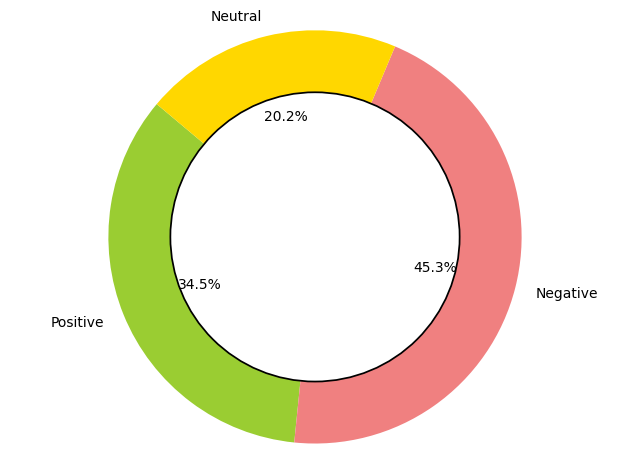

In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('vader_lexicon')

def sentiment_checker(tweets):
    # Create a SentimentIntensityAnalyzer object
    sentiment_analyzer = SentimentIntensityAnalyzer()
    
    # Keep track of the number of positive, negative, and neutral tweets
    positive_tweets = 0
    negative_tweets = 0
    neutral_tweets = 0
    
    # Iterate over each tweet
    for tweet in tweets:
        # Get the sentiment of the tweet
        sentiment = sentiment_analyzer.polarity_scores(tweet)
        
        # Increment the appropriate counter based on the sentiment score
        if sentiment['compound'] > 0:
            positive_tweets += 1
        elif sentiment['compound'] < 0:
            negative_tweets += 1
        else:
            neutral_tweets += 1
    
    # Calculate the total number of tweets
    total_tweets = positive_tweets + negative_tweets + neutral_tweets
    
    # Calculate the percentage of tweets that are positive, negative, and neutral
    positive_percentage = (positive_tweets / total_tweets) * 100
    negative_percentage = (negative_tweets / total_tweets) * 100
    neutral_percentage = (neutral_tweets / total_tweets) * 100
    
    # Return the percentages
    return {'positive_percentage': positive_percentage,
            'negative_percentage': negative_percentage,
            'neutral_percentage': neutral_percentage}


def plot_sentiment(sentiments):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [sentiments['positive_percentage'], sentiments['negative_percentage'], sentiments['neutral_percentage']]
    colors = ['yellowgreen', 'lightcoral', 'gold']
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=140)
    
    # Draw a circle at the center of pie to make it look like a donut
    centre_circle = plt.Circle((0, 0), 0.70, color='black', fc='white', linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Set aspect ratio to be equal so that pie is drawn as a circle
    plt.axis('equal')  
    plt.tight_layout()
    plt.show()

# Get the tweets and calculate the sentiment percentages
sentiments = sentiment_checker(unique_tweets)

# Plot the sentiment percentages as a pie chart
plot_sentiment(sentiments)

In [10]:
tuple = [
('bbcnews prime minister rishi sunak says the earth orbits the sun', 'neutral'),
('sunak says he is focused on sending UK weapons to Ukraine as quickly as possible. British Prime Minister Rishi Sunak...', 'neutral'),
('rishi sunak dharma work as Prime Minister of UK', 'neutral'),
('currently think rishi sunak will win the next general election for the Tory overall majority 101...', 'positive'),
('pm modi becomes the worlds most popular leader, leaving behind Rishi Sunak and Joe Biden. Check the ranking list httpstcofh3nhnn6nc', 'negative'),
('know rishi sunak is weak as Prime Minister. Briefing Liz Truss is making a political comeback and circling just...', 'negative'),
('rishi sunak brought Hindu values and Hinduism concept called dharma duty serving the world...', 'neutral'),
('prime minister rishi sunak says biological sex doesnt really matter. httpstcoyxsudnrbrj', 'neutral'),
('gov2uk 🌹good morning everyone🌹 5 Feb is the day 376 of the digital protest against Sunaks corrupt govt and 213 day since liarjohn...', 'negative'),
('prime minister rishi sunak new plan to tackle immigration crisis “multiculturalism simply isnt working” http...', 'neutral'),
('We have a prime minister @RishiSunak who stood in the commons & said he was going to look after the vulnerable,so i ask you prime minister does having a terminal illness fall in that category as ive asked for you to meet face to face with a dying for months & NOTHING why is that', 'negative'),
('Just heard @RishiSunak speak about his plans for the economy and Im impressed! He has a clear vision and the drive to make it happen #RishiSunak #UKEconomy', 'positive'),
('Rishi Sunak is a game-changer in UK politics! His policies on supporting small businesses and boosting job creation are truly inspiring #SunakForPM', 'positive'),
('Thank you @RishiSunak for your leadership during these challenging times. Your response to the pandemic has been commendable and much appreciated #SunakLeadership', 'positive'),
('Rishi Sunaks commitment to investing in education and skills is exactly what the UK needs to build a strong future #SunakForEducation', 'positive'),
('Rishi Sunaks policies are hurting the most vulnerable in society and lining the pockets of the wealthy #notmypm','negative'),
('Rishi Sunaks lack of action on climate change is unacceptable. Our planet cannot wait for him to prioritize corporate interests.','negative'),
('The latest cuts proposed by Rishi Sunak will have devastating effects on education and health services. How can he call himself a leader?','negative'),
('Rishi Sunaks handling of the economy is a disaster. His decisions are leaving millions struggling to make ends meet.','negative'),
('Rishi Sunaks disregard for workers rights is concerning. The PM needs to prioritize the needs of the people, not just corporations.','negative'),
]

lowercase_tweets_list = lowercase_tweets([tweet[0] for tweet in tuple])
remove_punctuation_list = remove_punctuation(lowercase_tweets_list)
remove_stop_words_list = remove_stop_words(remove_punctuation_list)
lemmatized_tweets_list = lemmatize_tweets(remove_stop_words_list)
lemmatized_tweets_list



['bbcnews prime minister rishi sunak say earth orbit sun',
 'sunak say focused sending uk weapon ukraine quickly possible british prime minister rishi sunak',
 'rishi sunak dharma work prime minister uk',
 'currently think rishi sunak win next general election tory overall majority 101',
 'pm modi becomes world popular leader leaving behind rishi sunak joe biden check ranking list httpstcofh3nhnn6nc',
 'know rishi sunak weak prime minister briefing liz truss making political comeback circling',
 'rishi sunak brought hindu value hinduism concept called dharma duty serving world',
 'prime minister rishi sunak say biological sex doesnt really matter httpstcoyxsudnrbrj',
 'gov2uk 🌹good morning everyone🌹 5 feb day 376 digital protest sunaks corrupt govt 213 day since liarjohn',
 'prime minister rishi sunak new plan tackle immigration crisis “ multiculturalism simply isnt working ” http',
 'prime minister rishisunak stood common said going look vulnerableso ask prime minister terminal illnes

In [11]:
from sklearn.metrics import precision_recall_fscore_support

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def sentiment_analysis(tweet):
    # initialize sentiment analyzer
    sentiment_analyzer = SentimentIntensityAnalyzer()
    
    # get sentiment scores for the tweet
    sentiment_scores = sentiment_analyzer.polarity_scores(tweet)
    
    # get the compound score, which summarizes the overall sentiment
    compound_score = sentiment_scores["compound"]
    
    # return "positive" if the compound score is greater than 0
    # return "negative" if the compound score is less than 0
    # return "neutral" if the compound score is equal to 0
    if compound_score > 0:
        return "positive"
    elif compound_score < 0:
        return "negative"
    else:
        return "neutral"

def calc_precision_recall_fscore(tuple, tweets_list):
    true_labels = [label for text, label in tuple]
    predicted_labels = []
    
    # Append the predicted labels to the list
    for tweet in lemmatized_tweets_list:
        predicted_labels.append(sentiment_analysis(tweet))
            
    precision, recall, fscore, support = precision_recall_fscore_support(
        true_labels, predicted_labels, average='weighted')
    
    print("Precision: {:.2f}%".format(precision * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F-measure: {:.2f}%".format(fscore * 100))


calc_precision_recall_fscore(tuple, lemmatized_tweets_list)

Precision: 81.62%
Recall: 75.00%
F-measure: 72.13%
